## Analyze e2e latencies for the single_client_e2e experiment

In [22]:
import re
import numpy as np
def get_results(path):
    computee2e = []
    consumee2e = []
    avg_batching_latencies = []
    avg_append_latency = []
    avg_batch_size = []
    with open(path+"/client_node7.log", "r") as f:
        lines = f.readlines()
        for line in lines:
            if "latencies: " in line:
                consume, compute = line.strip().split('latencies: ')[-1].split(',')[-2:]
                consumee2e.append(int(consume))
                computee2e.append(int(compute))
            if "average batch size: " in line:
                avg_batch_size.append(float(line.strip().split()[-1]))
            if "average batching latency: " in line:
                avg_batching_latencies.append(float(line.strip().split()[-1]))
            if "avg latency of" in line:
                avg_append_latency.append(float(line.strip().split()[-2]))

    computee2e = np.array(computee2e, dtype=int)
    consumee2e = np.array(consumee2e, dtype=int)
    avg_append_latency = np.array(avg_append_latency, dtype=float)

    print("results for computation time " + path.split("_")[-1] + " us")
    print("statistic/metric, total/compute e2e (us), consume e2e (us)")
    print(f"mean, {np.mean(computee2e):.2f}, {np.mean(consumee2e):.2f}")
    print(f"std, {np.std(computee2e):.2f}, {np.std(consumee2e):.2f}")
    print(f"p50, {np.percentile(computee2e, 50):.2f}, {np.percentile(consumee2e, 50):.2f}")
    print(f"p99, {np.percentile(computee2e, 90):.2f}, {np.percentile(consumee2e, 90):.2f}")

    print("average batch size, average batching latencies")
    print(f"{avg_batch_size[-1]:.2f}, {avg_batching_latencies[-1]:.2f}")

    return np.mean(computee2e), np.mean(consumee2e), np.mean(avg_append_latency)


results for computation time 100 us
statistic/metric, total/compute e2e (us), consume e2e (us)
mean, 3190.94, 3056.70
std, 1159.01, 1154.29
p50, 3143.00, 3005.00
p99, 4193.00, 4049.00
average batch size, average batching latencies
1.38, 35.39
****************************
results for computation time 200 us
statistic/metric, total/compute e2e (us), consume e2e (us)
mean, 3052.92, 2779.66
std, 779.12, 777.30
p50, 3087.00, 2853.00
p99, 4249.00, 3978.00
average batch size, average batching latencies
1.39, 32.47
****************************
results for computation time 500 us
statistic/metric, total/compute e2e (us), consume e2e (us)
mean, 3554.61, 2870.06
std, 797.55, 798.46
p50, 3536.00, 2976.00
p99, 4459.00, 3892.00
average batch size, average batching latencies
1.44, 19.44
****************************
results for computation time 800 us
statistic/metric, total/compute e2e (us), consume e2e (us)
mean, 4956.49, 3787.97
std, 1123.90, 1041.74
p50, 4915.00, 3977.00
p99, 5700.00, 4197.00
aver

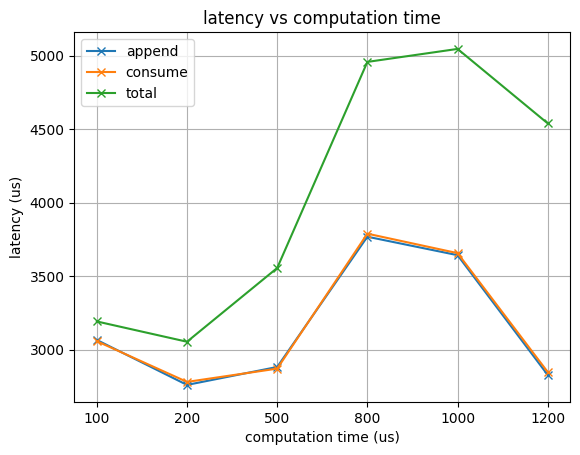

In [24]:
import matplotlib.pyplot as plt
total = []
consume = []
append = []


comp_times=["100", "200", "500", "800", "1000", "1200"]
for comp_time in comp_times:
    total_lat, consume_lat, append_lat = get_results(f"../results/logs/e2e_{comp_time}")
    total.append(total_lat)
    consume.append(consume_lat)
    append.append(append_lat)
    print("****************************")

fig, ax = plt.subplots()
ax.plot(comp_times, append, label='append', marker='x')
ax.plot(comp_times, consume, label='consume', marker='x')
ax.plot(comp_times, total, label='total', marker='x')

ax.set(xlabel='computation time (us)', ylabel='latency (us)', title='latency vs computation time')
ax.grid()
ax.legend()
fig.savefig("latency_vs_comp_time.png", dpi=600)
plt.show()